In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization


# #Models
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression


# #Metrics and Testing
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix

In [4]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
#df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')


#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [10]:
START = datetime.date(2010,7,1)
END = datetime.date(2010,7,30)

In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [16]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [21]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

In [17]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words)

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/614576161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/614576161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/614576161.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [23]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()


/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/1939301759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()


In [25]:
tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/3384156628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()


In [26]:
tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/726549895.py:2: RuntimeWarning: invalid value encountered in divide
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_66879/726549895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()


Aggregate all data

In [ ]:
# df1['date'] = pd.to_datetime(df1['date'])
# df2['date'] = pd.to_datetime(df2['date'])

In [ ]:
# df1['day_date'] = pd.to_datetime(df1['date']).dt.date
# df2['day_date'] = pd.to_datetime(df2['date']).dt.date

In [ ]:
# df1['day_date'] = pd.to_datetime(df1['day_date'])
# df2['day_date'] = pd.to_datetime(df2['day_date'])

In [ ]:

# df1_bs = df1[((df1['day_date'] >= datetime.date(2010, 7, 1)) & (df1['day_date'] <= datetime.date(2010, 7, 15)))]
# df2_bs = df2[((df2['day_date'] >= datetime.date(2010, 7, 1)) & (df2['day_date'] <= datetime.date(2010, 7, 15)))]

# df1_bs = df1[((df1['day_date'] <= datetime.datetime(2010, 7, 7)) & (df1['day_date'] >= datetime.datetime(2010, 7, 1)))]
# df2_bs = df2[((df1['day_date'] <= datetime.datetime(2010, 7, 7)) & (df1['day_date'] >= datetime.datetime(2010, 7, 1)))]

In [27]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [28]:
df_merged['label'] = 'normal'

In [29]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [30]:
dates = df_merged['day_date']
dates = dates.unique()

In [31]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['to'].notnull()].shape[0]
        file_count = userd[userd['filename'].notnull()].shape[0]
        http_count = userd[userd['url'].notnull()].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        tfidf3_mean = userd['df3tfidf_mean'].mean()
        tfidf4_mean = userd['df4tfidf_mean'].mean()
        tfidf5_mean = userd['df5tfidf_mean'].mean()
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label='bad'
        else: label = 'normal'
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, tfidf3_mean, tfidf4_mean, tfidf5_mean, label])


In [32]:
len(dfwow)

20736

In [34]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'tfidf3_mean', 'tfidf4_mean', 'tfidf5_mean', 'label'])


In [35]:
final.loc[(final['label'] == 'bad')]

,date,username,login_count,logout_count,email_count,file_count,http_count,start_time,end_time,tfidf3_mean,tfidf4_mean,tfidf5_mean,label
526,2010-07-01,RMW0542,1,1,11,0,102,2010-07-01 07:58:00,2010-07-01 17:59:48,0.167441,NaN,0.168980,bad
757,2010-07-01,LCC0819,1,1,11,4,98,2010-07-01 08:28:00,2010-07-01 20:35:26,0.162432,0.144089,0.167272,bad
797,2010-07-01,PNL0301,1,1,1,0,18,2010-07-01 08:46:00,2010-07-01 17:50:25,0.142250,NaN,0.174718,bad
820,2010-07-01,AAF0535,1,1,3,5,37,2010-07-01 08:52:00,2010-07-01 16:54:40,0.176862,0.159558,0.170484,bad
1484,2010-07-02,RMW0542,1,1,11,3,105,2010-07-02 07:58:00,2010-07-02 18:04:21,0.176852,0.328482,0.174313,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20030,2010-07-30,RAR0725,1,1,1,0,13,2010-07-30 07:46:00,2010-07-30 16:24:19,0.169815,NaN,0.180452,bad
20467,2010-07-30,IJM0776,1,1,5,0,35,2010-07-30 08:31:00,2010-07-30 16:24:29,0.173405,NaN,0.169993,bad
20523,2010-07-30,LCC0819,1,1,9,7,95,2010-07-30 08:36:00,2010-07-30 20:21:05,0.191337,0.157190,0.169305,bad
20657,2010-07-30,DIB0285,1,1,10,0,102,2010-07-30 09:15:00,2010-07-30 18:02:34,0.163123,NaN,0.168970,bad


<Axes: xlabel='label', ylabel='count'>

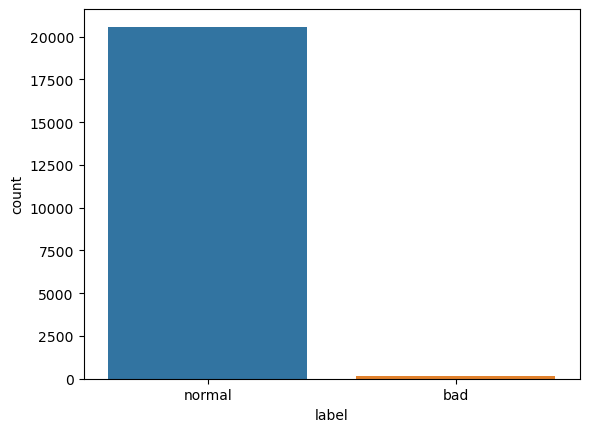

In [39]:
sb.countplot(data=final, x='label')